# 데이터 불러오기

In [77]:
import pandas as pd
df = pd.read_csv('../datasets/빅분기 실기 데이터/breast-cancer-wisconsin.csv', encoding='utf-8')
df

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [78]:
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

# X와 y 나누기

In [79]:
X = df.drop('Class', axis=1)
y = df[['Class']]

# train / test 데이터 나누기
- stratify=y : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주 비율에 맞게 구분하라는 것

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 정규화
- MinMaxScaler : 최소값 0, 최대값 1로 
- StandardScaler : 평균 0, 표준편차 1로

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax = MinMaxScaler()

In [82]:
scaler_minmax.fit(X_train) # 적용
X_scaled_minmax_train = scaler_minmax.transform(X_train) # 변환

## test 데이터 정규화
- 테스트 데이터는 훈련 데이터로 fit 시킨 걸 transform 해야 함
- 표준화 시킨 것 보면 평균이 0이 아니고 표준편차도 1이 아님 (표준화 기준이 훈련 데이터이기 때문)

In [83]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# 모델 학습

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

c:\Users\qkrtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [85]:
# test 데이터 

pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9560975609756097

# 혼동행렬

In [87]:
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_test, pred_test)
print('훈련 데이터 오차행렬:\n', confusion_train)

훈련 데이터 오차행렬:
 [[128   5]
 [  4  68]]


In [88]:
from sklearn.metrics import classification_report

cfreport_test = classification_report(y_test, pred_test)
print('분류예측 레포트:\n', cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       133
           1       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



# ROC 지표

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923767752715121

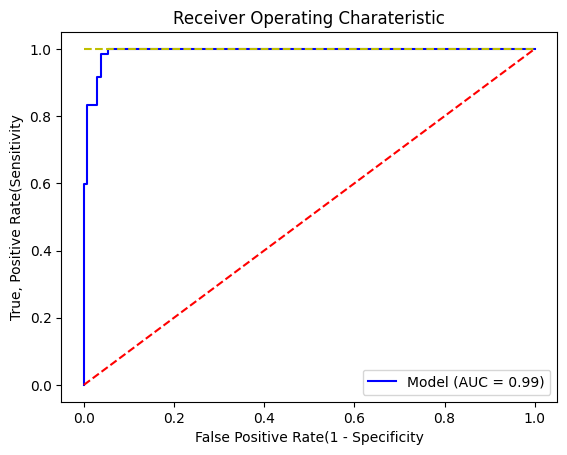

In [90]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Charateristic')
plt.xlabel('False Positive Rate(1 - Specificity')
plt.ylabel('True, Positive Rate(Sensitivity')

plt.plot(fpr, tpr, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

# 예측값 병합 및 저장

In [97]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test['y_pred'] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
64,0,0,0.975805,0.024195
676,0,0,0.986047,0.013953
447,0,0,0.959322,0.040678
460,0,0,0.986095,0.013905
1,0,1,0.088755,0.911245
...,...,...,...,...
419,0,1,0.029315,0.970685
642,1,1,0.005102,0.994898
548,0,0,0.983928,0.016072
381,0,0,0.983912,0.016088


In [98]:
total_test = pd.concat([X_test, y_test], axis=1)
total_test

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
64,1117152,4,1,1,1,2,1,3,1,1,0,0,0.975805,0.024195
676,714039,3,1,1,1,2,1,1,1,1,0,0,0.986047,0.013953
447,1276091,6,1,1,3,2,1,1,1,1,0,0,0.959322,0.040678
460,1287282,3,1,1,1,2,1,1,1,1,0,0,0.986095,0.013905
1,1002945,5,4,4,5,7,10,3,2,1,0,1,0.088755,0.911245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1293439,6,9,7,5,5,8,4,2,1,0,1,0.029315,0.970685
642,1334015,7,8,8,7,3,10,7,2,3,1,1,0.005102,0.994898
548,1328755,3,1,1,1,2,1,2,1,1,0,0,0.983928,0.016072
381,1168278,3,1,1,1,2,1,2,1,1,0,0,0.983912,0.016088
